In [1]:
import mne
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import gzip

In [2]:
data_path = 'ssvep_dataset/'
subj_list = os.listdir(data_path)
records = {k: [] for k in subj_list}
for subj in subj_list:
    record_all = os.listdir(data_path+subj+'/')
    n = len(record_all)//4 #number of records of a given subject
    for i in range(n):
        records[subj].append(record_all[i*4][:28])
records

{'subject01': ['record-[2012.07.06-19.02.16]', 'record-[2012.07.06-19.06.14]'],
 'subject02': ['record-[2012.07.19-17.36.23]', 'record-[2012.07.19-17.41.14]'],
 'subject03': ['record-[2012.07.11-15.25.23]', 'record-[2012.07.11-15.33.08]'],
 'subject04': ['record-[2012.07.18-17.52.30]', 'record-[2012.07.18-17.56.53]'],
 'subject05': ['record-[2012.07.19-11.24.02]', 'record-[2012.07.19-11.28.18]'],
 'subject06': ['record-[2012.07.20-12.20.55]', 'record-[2012.07.20-12.26.47]'],
 'subject07': ['record-[2012.07.11-15.33.08]',
  'record-[2012.07.18-09.15.30]',
  'record-[2012.07.18-09.21.13]'],
 'subject08': ['record-[2013.04.06-16.22.32]',
  'record-[2013.04.06-16.22.32]',
  'record-[2013.04.06-16.29.18]'],
 'subject09': ['record-[2013.04.09-17.32.29]', 'record-[2013.04.09-17.39.37]'],
 'subject10': ['record-[2014.02.26-15.10.48]',
  'record-[2014.02.26-15.10.48]',
  'record-[2014.02.26-15.32.36]',
  'record-[2014.02.26-15.40.22]',
  'record-[2014.02.26-15.50.09]',
  'record-[2014.02.26-16.

In [3]:
#choose a subject and a record of that subject
chosen_subject_index = 11 #suject12
chosen_subject = subj_list[chosen_subject_index]
print("The chosen subject is",chosen_subject,". He has",len(records[chosen_subject]),"records")
session_index = 0 #the first session of the subject12
print("The chosen session was done on",records[chosen_subject][session_index][8:27])

The chosen subject is subject12 . He has 5 records
The chosen session was done on 2014.03.10-19.17.37


In [67]:
tmin=2
tmax=5
event_id = {1:'resting', 2:'stim13', 4:'stim17', 3:'stim21'}#define the events
freq_events={'stim13':13,'stim17':17,'stim21':21}
event_name = {33025:'stim13',33026:'stim21',33027:'stim17', 33024:'resting', 32770:'stop_exp',32779:'start_stim',
              32769:'start_exp', 32780:'stop_stim'}
LB = 1
HB = 43
sfreq = 256

In [5]:
fname = chosen_subject+'/'+records[chosen_subject][session_index]
with gzip.open(data_path + fname + '.pz', 'rb') as f:
    o = pickle.load(f, encoding='latin1')
raw_signal = o['raw_signal'].T
event_pos = o['event_pos'].reshape((o['event_pos'].shape[0]))
event_type = o['event_type'].reshape((o['event_type'].shape[0]))

In [6]:
total_record_time = len(raw_signal[0])/sfreq
total_record_time

750.875

In [7]:
raw_signal.shape

(8, 192224)

In [8]:
event_pos

array([10369, 10881, 11649, 12929, 13185, 13953, 15233, 15489, 16257,
       17537, 17793, 18561, 19841, 20097, 20865, 22145, 22401, 23169,
       24449, 24705, 25473, 26753, 27009, 27777, 29057, 29313, 30081,
       31361, 31617, 32385, 33665, 33921, 34689, 35969, 36225, 36993,
       38273, 38529, 39297, 40577, 40833, 41601, 42881, 43137, 43905,
       45185, 45441, 46209, 47489, 47745, 48513, 49793, 50049, 50817,
       52097, 52353, 53121, 54401, 54657, 55425, 56705, 56961, 57729,
       59009, 59265, 60033, 61313, 61569, 62337, 63617, 63873, 64641,
       65921, 66177, 66945, 68225, 68481, 69249, 70529, 70785, 71553,
       72833, 73089, 73857, 75137, 75393, 76161, 77441, 77697, 78465,
       79745, 80001, 80769, 82049, 82305, 83073, 84353, 84609])

In [9]:
#time of the first event 
event_pos[0]/sfreq

40.50390625

In [10]:
len(event_pos)

98

In [11]:
event_type

array([32769, 33024, 32779, 32780, 33024, 32779, 32780, 33024, 32779,
       32780, 33026, 32779, 32780, 33027, 32779, 32780, 33025, 32779,
       32780, 33026, 32779, 32780, 33024, 32779, 32780, 33025, 32779,
       32780, 33027, 32779, 32780, 33025, 32779, 32780, 33026, 32779,
       32780, 33024, 32779, 32780, 33027, 32779, 32780, 33026, 32779,
       32780, 33027, 32779, 32780, 33025, 32779, 32780, 33024, 32779,
       32780, 33027, 32779, 32780, 33025, 32779, 32780, 33026, 32779,
       32780, 33027, 32779, 32780, 33024, 32779, 32780, 33025, 32779,
       32780, 33026, 32779, 32780, 33025, 32779, 32780, 33027, 32779,
       32780, 33024, 32779, 32780, 33026, 32779, 32780, 33027, 32779,
       32780, 33026, 32779, 32780, 33025, 32779, 32780, 32770],
      dtype=uint16)

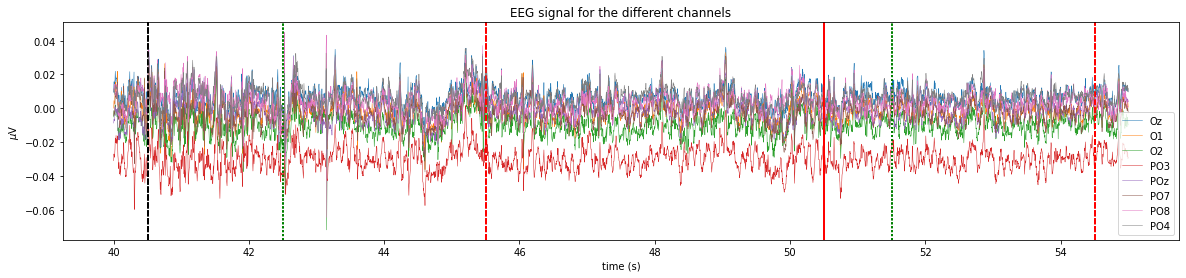

In [12]:
def index(x,l):
    for j in range(len(l)):
        if x==l[j]:
            return j
    return None

n_seconds = 15
starting_time = 40
time = np.linspace(starting_time, starting_time + n_seconds, n_seconds * sfreq).reshape((1, n_seconds * sfreq))[0]
channels = np.array(['Oz','O1','O2','PO3','POz','PO7','PO8','PO4'])
fig = plt.figure(figsize=(20,4))
for i in range(len(channels)):
    plt.plot(time.T, raw_signal[channels == channels[i], int(sfreq*starting_time):int(sfreq*starting_time)+n_seconds*sfreq].T, lw=0.5,label=channels[i])
    for t in range(len(time)):
        if int(time[t]*sfreq) in event_pos:
            ind = index(int(time[t]*sfreq),event_pos)
            if event_type[ind]==32769: #start experiment
                plt.axvline(x=time[t],c='black',linestyle='dashed')
            if event_type[ind]==32770: #stop experiment
                plt.axvline(x=time[t],c='black')
            if event_type[ind]==32779: #start stimulus
                plt.axvline(x=time[t],c='r',linestyle='dashed')
            if event_type[ind]==32780: #stop stimulus
                plt.axvline(x=time[t],c='r')
            if event_type[ind]==33024: #resting
                plt.axvline(x=time[t],c='g',linestyle='dotted')
            if event_type[ind]==33025: #13 hz
                plt.axvline(x=time[t],c='y',linestyle='dotted')
            if event_type[ind]==33026: #21 hz
                plt.axvline(x=time[t],c='b',linestyle='dotted')
            if event_type[ind]==33027: #17 hz
                plt.axvline(x=time[t],c='m',linestyle='dotted')
            
                
plt.xlabel("time (s)")
plt.ylabel(r"$\mu$V")
plt.title('EEG signal for the different channels')
plt.legend()

In [81]:
events=[] #stock the starting time of an event and its type (only resting, stim13, stim21 and stim17)
for i in range(len(event_pos)):
    if event_type[i]==33024: #resting
        events.append([event_pos[i+1],1])
    if event_type[i]==33025: #stim13
        events.append([event_pos[i+1],2])
    if event_type[i]==33026: #stim21
        events.append([event_pos[i+1],3])
    if event_type[i]==33027: #stim17
        events.append([event_pos[i+1],4])

In [82]:
len(events)

32

In [83]:
epochs=[]
for i in range(len(events)):
    epochs.append(raw_signal[:, events[i][0]+sfreq*tmin:events[i][0]+sfreq*tmax])

(8, 768)


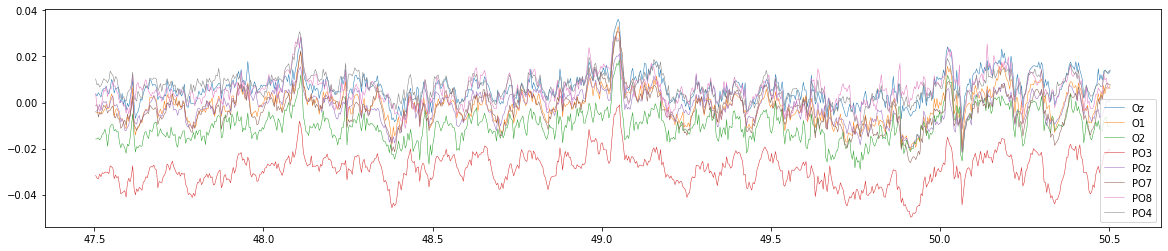

In [84]:
#plot the first epoch
n_seconds = 3
epoch = epochs[0]
print(epoch.shape)
starting_time=events[0][0]/sfreq+tmin
time = np.linspace(starting_time, starting_time + n_seconds, n_seconds * sfreq).reshape((1, n_seconds * sfreq))[0]
fig = plt.figure(figsize=(20,4))
for i in range(len(channels)):
    plt.plot(time.T, epoch[channels == channels[i], :n_seconds*sfreq].T,lw=0.5,label=channels[i])
plt.legend(loc='best')
plt.show()


In [85]:
epochs_by_events = {1:[],2:[],3:[],4:[]}
for i in range(len(events)):
    epochs_by_events[events[i][1]].append(epochs[i])
len(epochs_by_events[1])

8

In [86]:
psds = {c:{i : [] for i in range(1,5)} for c in range(len(channels))}
for c in range(len(channels)):
    for i in range(1,5):
        mean_psd = np.zeros(129)
        for j in range(8):
            freq,psd = signal.welch(epochs_by_events[i][j][c,:],fs=sfreq)
            mean_psd +=psd/8
        psds[c][i].extend(mean_psd)

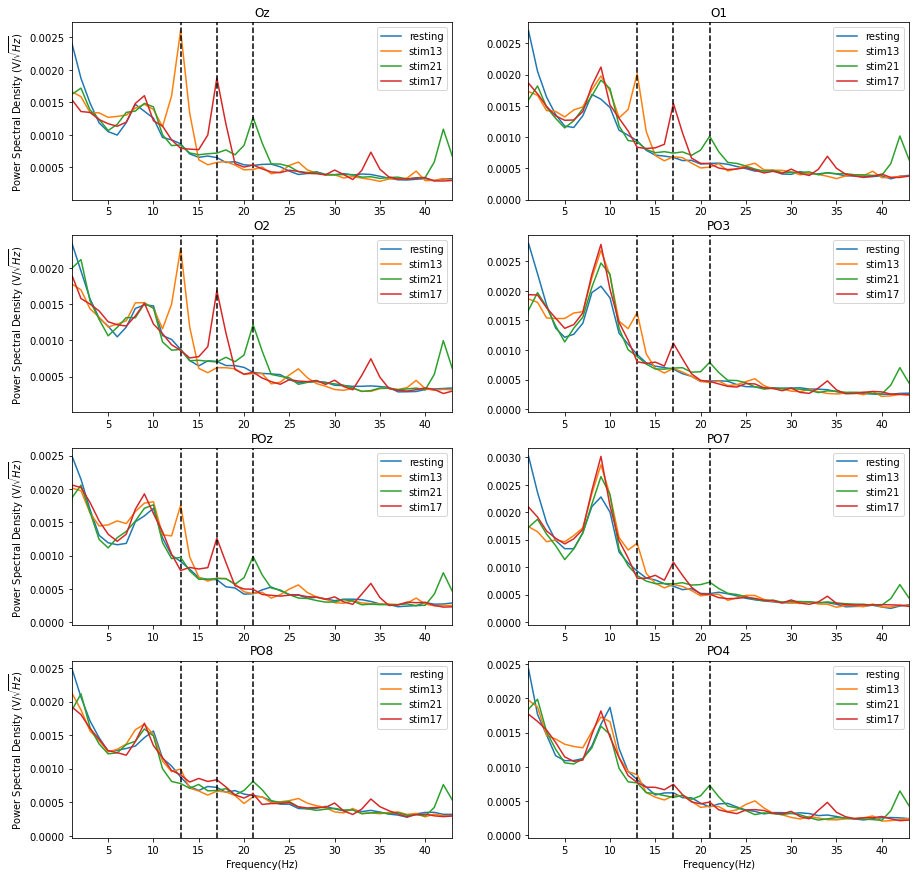

In [87]:
fig,axs = plt.subplots(4,2,figsize=(15,15))
axs = axs.flatten()

for c in range(len(channels)):
    for i in range(1,5):
        axs[c].plot(freq,np.sqrt(psds[c][i]),label=event_id[i])
        if i !=1:
            axs[c].axvline(x=freq_events[event_id[i]],linestyle='dashed',color='black')
    if c%2==0:
        axs[c].set_ylabel('Power Spectral Density (V/$\\sqrt{Hz}$) ')
    axs[c].set_title(channels[c])
    axs[c].legend()
    axs[c].set_xlim((LB,HB))
    
    
axs[c-1].set_xlabel('Frequency(Hz)')
axs[c].set_xlabel('Frequency(Hz)')
plt.show()